Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Anamarija Hauptman"
COLLABORATORS = ""

---

# Domača naloga 4: Robustno iskanje 2D objektov

1. Zgornji in spodnji prag za povezovanje robov pri Canny-jevem detektorju robov lahko avtomatsko izračunamo na podlagi statistične analize sivin v sliki. Napišite funkcijo za detekticijo robov, ki avtomatsko izračuna spodnji in zgornji prag za povezovanje robov in ju nato uporabi za detekcijo s Cannyjevim detektorjem. Z uporabo vhodne spremenljivke `thr_type` ločite med dvema načinoma določanja pragov:

  * `thr_type = 1`:
    $$ T_L = \max{(0, (1 - \sigma) m)} $$
    $$ T_H = \min{(255, (1 + \sigma) m)} $$

  * `thr_type = 2`:
    $$ T_L = T_O/2 $$
    $$ T_H = T_O $$

  kjer je $m$ mediana sivin v sliki, $\sigma=1/3$ in $T_O$ je prag pridobljen z Otsu upragovljanjem. Otsu upragovljanje avtomatsko določi prag, ki najbolje razmeji sliko na dva dela. Funkcijo poiščite v knjižnici OpenCV. Na treh lastno poiskanih slikah, ki imajo različne zahtevnosti določanja robov, primerjajte oba avtomatska načina izbire z ročno izbranima pragovoma, ki najbolje izluščita rob. Prikažite slike in izračunane slike robov, komentirajte rezultate in uspešnost avtomatskih postopkov.

Implementirajte funkcijo `canny`:

In [12]:
import numpy as np
import cv2 as cv
from rvlib import showImage, gammaImage
import matplotlib.pyplot as plt

imgG = cv.imread('data/slika1.jpg', 0) # s parametrom 0 loadamo grayscale

In [13]:
def cornersDetector(iImage, thr_type=1):
    iImage = cv.cvtColor(iImage, cv.COLOR_BGR2GRAY)
    if thr_type == 1:
        sigma = 1/3
        m = np.mean(iImage)
        T_l = np.max([0, int((1 - sigma) * m)])
        T_h = np.min([255, int((1 + sigma) * m)])
    elif thr_type == 2:
        T_O, _ = cv.threshold(iImage, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        T_l = T_O / 2
        T_h = T_O
    else:
        return np.zeros_like(iImage)
    oImage = cv.Canny(iImage, T_l, T_h)
    #print(T_l, T_h)
    return oImage

Prikažite originale izbranih slik in izračunane slike robov na oba načina (`thr_type = 1` in `thr_type = 2`):

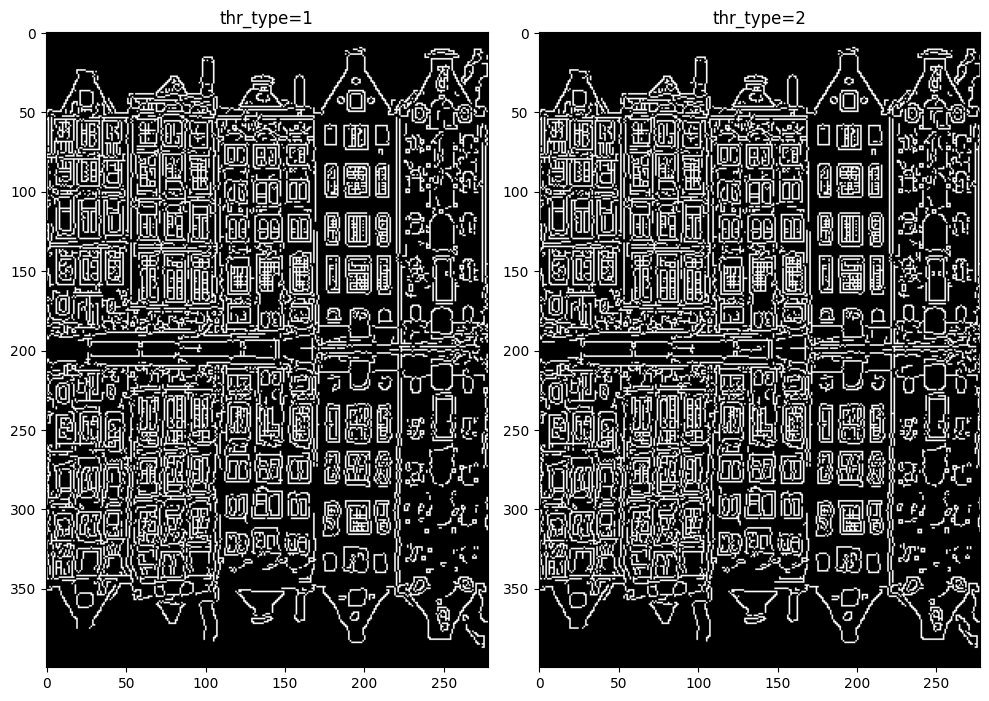

In [14]:

img1 = cv.imread('data/slika1.jpg')
edges1_1 = cornersDetector(img1, thr_type=1)
edges1_2 = cornersDetector(img1, thr_type=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].set_title('thr_type=1')
axs[0].imshow(edges1_1, cmap='gray')
axs[1].set_title('thr_type=2')
axs[1].imshow(edges1_2, cmap='gray')
plt.tight_layout()
plt.show()

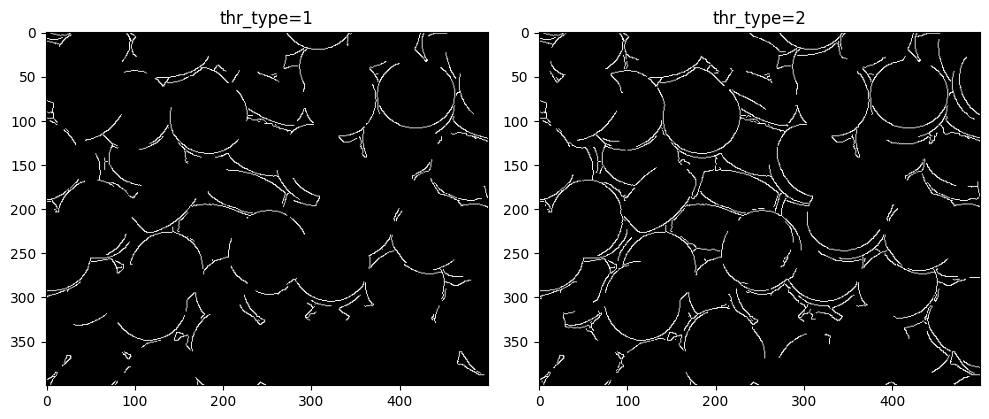

In [15]:
img2 = cv.imread('data/slika2.jpg')
edges2_1 = cornersDetector(img2, thr_type=1)
edges2_2 = cornersDetector(img2, thr_type=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].set_title('thr_type=1')
axs[0].imshow(edges2_1, cmap='gray')
axs[1].set_title('thr_type=2')
axs[1].imshow(edges2_2, cmap='gray')
plt.tight_layout()
plt.show()

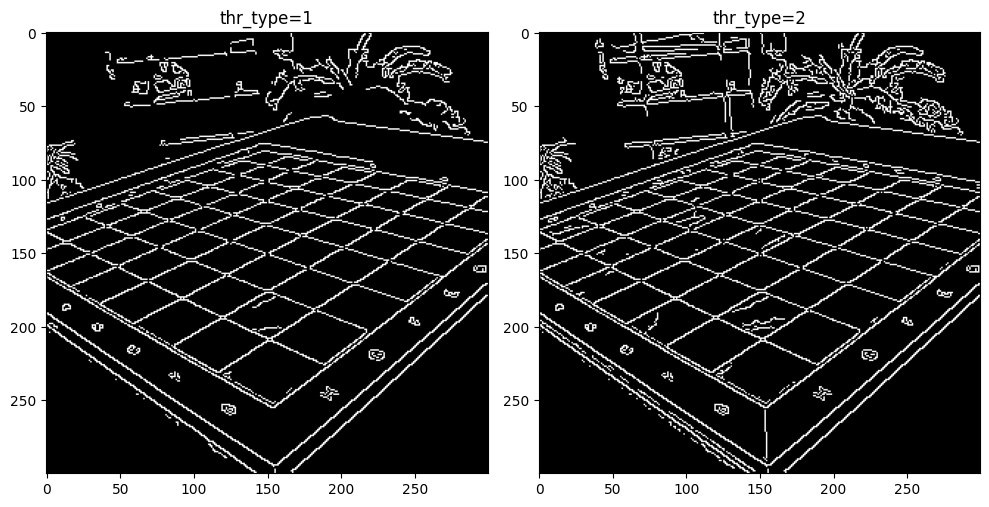

In [16]:
img3 = cv.imread('data/slika3.jpg')
edges3_1 = cornersDetector(img3, thr_type=1)
edges3_2 = cornersDetector(img3, thr_type=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].set_title('thr_type=1')
axs[0].imshow(edges3_1, cmap='gray')
axs[1].set_title('thr_type=2')
axs[1].imshow(edges3_2, cmap='gray')
plt.tight_layout()
plt.show()

Komentirajte rezultate in uspešnost avtomatskih postopkov:

2. Na vajah smo si pogledali Houghovo transformacijo za detekcijo premic v sliki. Na podoben način lahko detektiramo tudi okrogle strukture na sliki. Naložite sliko `data/slika4.jpg` barvnih kroglic, jo zgladite z Gaussovim filtrom iz knjižnice OpenCV z velikosto jedra $3 \times 3$, ter nato uporabite OpenCV funkcijo `HoughCircles` za detekcijo središč in radijev krožnic. Kot rezultat detekcije na originalno sliko superponirajte narisane krožnice (funkcija `circle`) detektiranih kroglic. Število detektiranih kroglic tudi izpišite. Na podlagi barvnega tona (iz $HSV$ prostora) središča krožnice avtomatsko preštejte število kroglic vsake barve. Opozorilo: funkcija `HoughCircles` že sama uporabi Cannyjev detektor robov, pragova pa podate kot parametra `param1` in `param2`, zato je vhodna slika v funkcijo sivinska slika in ne slika robov kot je bilo to na vajah. Pravilno izbiro pragov pa vseeno poiščite s klicem funkcije `Canny` in prikazom njenega rezultata.

stevilo detektiranih kroglic: 36
oranzne kroglice: 23, rumene kroglice: 2, zelene kroglice: 0, modre kroglice: 0


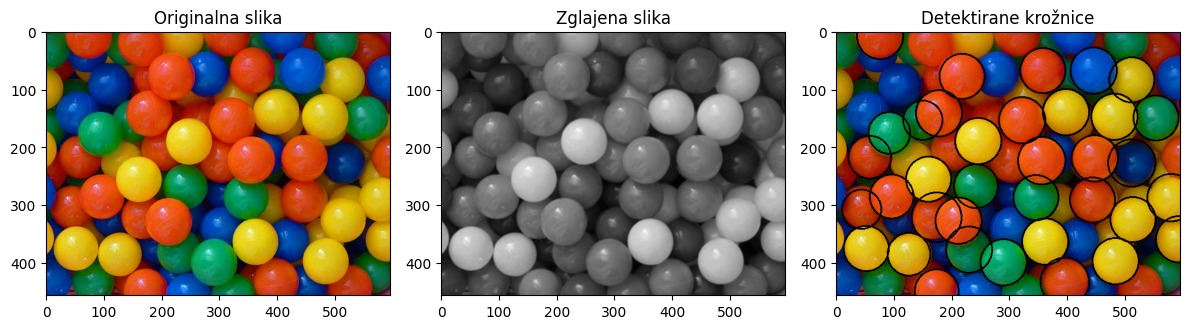

In [17]:
import cv2 as cv
from rvlib import showImage
import numpy as np

# Glajenje
img4 = cv.imread('data/slika4.jpg')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
blured_img4 = cv.GaussianBlur(img4, (3, 3), cv.BORDER_DEFAULT)
blured_img4 = cv.cvtColor(blured_img4, cv.COLOR_RGB2GRAY)
img4_circles = np.copy(img4)
hsv_img4 = cv.cvtColor(img4, cv.COLOR_RGB2HSV)

#circles = cv.HoughCircles(blured_img4, cv.HOUGH_GRADIENT_ALT, 1, 20, param1=150, param2=0.9, minRadius=30, maxRadius=50)
circles = cv.HoughCircles(blured_img4, cv.HOUGH_GRADIENT, 1, 15, param1=108, param2=20, minRadius=30, maxRadius=50)
#print('circles:', circles)
circles = np.uint16(np.around(circles))

o = 0 #oranzna
r = 0 #rumena
z = 0 #zelena
m = 0 #modra

'''
zelena: 140 - 170
oranžna: 5 - 20
rumena: 45 - 60
modra: 210 - 220

                T_l     T_h
thr_type=1      64      128
thr_type=2      54.0    108.0
'''

for i in circles[0, :]:
    cv.circle(img4_circles, (i[0], i[1]), i[2], (0, 0, 0), 2)
    #cv.circle(img4_circles, (i[0], i[1]), 2, (0, 0, 255), 3)
    if (i[0] <= img4.shape[0] and i[1] <= img4.shape[1]):
        h = hsv_img4[i[0], i[1]][0]
    elif (i[0] > img4.shape[0]):
        h = hsv_img4[img4.shape[0] - 1, i[1]][0]
    elif (i[1] > img4.shape[1]):
        h = hsv_img4[i[0], img4.shape[1] - 1][0]
    else:
        h = 0
    if (h >= 1 and h <= 30):
        o += 1
    elif (h >= 35 and h <= 70):
        r += 1
    elif (h >= 130 and h <= 180):
        z += 1
    elif (h >= 200 and h <= 230):
        m += 1
print('stevilo detektiranih kroglic:', len(circles[0, :]))
print('oranzne kroglice: ' + str(o) + ', rumene kroglice: ' + str(r) + ', zelene kroglice: ' + str(z) + ', modre kroglice: ' + str(m))

fig, axs = plt.subplots(1, 3, figsize=(12, 8))
axs[0].set_title('Originalna slika')
axs[0].imshow(img4)
axs[1].set_title('Zglajena slika')
axs[1].imshow(blured_img4, cmap='gray')
axs[2].set_title('Detektirane krožnice')
axs[2].imshow(img4_circles)
plt.tight_layout()
plt.show()

Napišite kodo za detekcijo krožnic:

Prikažite originalno sliko s superponiranimi krožnicami in izpišite število detektiranih kroglic:

Preštejte število kroglic vsake barve in izpišite števila:

3. Z drugačno kriterijsko funkcijo, kot jo za analizo lastnih vrednosti $\lambda_1$ in $\lambda_2$ matrike $M$, $\lambda_1 >\lambda_2$, uporablja Harrisov detektor oglišč, lahko iščemo, detektiramo ali poudarjamo podolgovate strukture v sliki. Ena od tovrstnih funkcij je **linearna anizotropičnost**:
$$Q_{LA} = \frac{\lambda_1 - \lambda_2}{\lambda_1 + \lambda_2 + \beta}\,,$$
kjer je $\beta > 0$ poljubna konstanta. Napišite funkcijo za poudarjanje podolgovatih struktur v vhodni sivinski sliki `iImage`:
    ```python
    def enhanceLinear( iImage, iSigma, iBeta ):
        return oQLA
    ```
kjer je `iSigma` standardna deviacija Gaussove funkcije za glajenje elementov matrike $M$, `iBeta` pa poljubna nenegativna konstanta. Nesortirane lastne vrednosti Harrisovega detektorja lahko dobite z OpenCV funkcijo `cornerEigenValsAndVecs`.

 Naložite barvno $RGB$ sliko `data/slika5.png`, jo pretvorite v sivinsko sliko in nelinearno skalirajte z vrednostjo $\gamma=2$. Uporabite funkcijo `enhanceLinear()` za poudarjanje cest na satelitski sliki tako, da določite optimalne vrednosti parametrov `iSigma` in `iBeta`. Prikažite po vašem optimalen odziv `oQLA` s poudarjenimi podolgovatimi strukturami in izpišite izbrani vrednosti `iSigma` in `iBeta`. Z upragovljanjem odziva izluščite masko cest in jih na barvni sliki pobarvajte z rdečo barvo.

 S primerno izbiro parametrov lahko Harrisov detektor uporabimo tudi za zaznavanje okroglih struktur. Na isti sivinski in nelinearno skalirani sliki s funkcijo `cornerHarris` razmejite območja objektov in območja brez rastja. Pridobljeni odziv prikažite, njegovo razmejitev pa uporabite na barvni sliki za obarvanje teh območij z modro barvo. Ena izmed možnih rešitev je prikazana na spodnji sliki.

 ![Road detection](images/RV_5_SLO_road_detection.png)

Implementirajte funkcijo `enhanceLinear`:

In [ ]:

def enhanceLinear(iImage, iSigma, iBeta):
    oQLA = cv.cornerEigenValsAndVecs(iImage, )
    return oQLA

Naložite barvno $RGB$ sliko `data/slika5.png`, jo pretvorite v sivinsko sliko, jo nelinearno skalirajte z vrednostjo $\gamma=2$ ter prikažite dobljeno sliko:

In [ ]:
img5 = cv.imread('data/slika5.png')
gray_img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)


Poiščite optimalne parametre `iSigma` in `iBeta`. Prikažite odziv funkcije `enhanceLinear` z optimalnimi parametri in izpišite le-te parametre:

Upragovite odziv, izluščite masko cest in na originalni sliki pobarvajte ceste z rdečo barvo ter prikažite dobljeno sliko:

Na isti sivinski in nelinearno skalirani sliki s funkcijo `cornerHarris` izluščite območja objektov in območja brez rastja. Pridobljeni odziv prikažite:

Na originalno sliko z obarvanimi cestami obarvajte z modro barvo še območja objektov ter prikažite dobljeno sliko:
